# Exploratory Analysis

In [ ]:
## Preliminary Analysis
####  Drop Null / Observation count

In [1]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np


%matplotlib inline


C:\Users\emanuele.rusina\AppData\Local\Continuum\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [4]:
data_raw = pd.read_csv("datasets/import_test.csv")
print data_raw.head()

   SUM(case when g.genre =    THEN p.playback_watched END)/60000 ,  ,  1  \
0  SUM(case when g.genre =    THEN p.playback_watched END)/60000 ,  ,  2   
1  SUM(case when g.genre =    THEN p.playback_watched END)/60000 ,  ,  3   
2  SUM(case when g.genre =    THEN p.playback_watched END)/60000 ,  ,  4   
3  SUM(case when g.genre =    THEN p.playback_watched END)/60000 ,  ,  5   
4  SUM(case when g.genre =    THEN p.playback_watched END)/60000 ,  ,  6   

  SUM(case when g.genre = 1 THEN p.playback_watched END)/60000 ,  
0  SUM(case when g.genre = 2 THEN p.playback_watc...              
1  SUM(case when g.genre = 3 THEN p.playback_watc...              
2  SUM(case when g.genre = 4 THEN p.playback_watc...              
3  SUM(case when g.genre = 5 THEN p.playback_watc...              
4  SUM(case when g.genre = 6 THEN p.playback_watc...              


## Preliminary Analysis
####  Drop Null / Observation count

In [3]:
data = data_raw.dropna() 
print data.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

After excluding Null records, the dataset includes x unique observations.

#### Summary table

In [4]:
print data.describe()

            admit         gre        gpa    prestige
count  400.000000  398.000000  398.00000  399.000000
mean     0.317500  588.040201    3.39093    2.486216
std      0.466087  115.628513    0.38063    0.945333
min      0.000000  220.000000    2.26000    1.000000
25%      0.000000  520.000000    3.13000    2.000000
50%      0.000000  580.000000    3.39500    2.000000
75%      1.000000  660.000000    3.67000    3.000000
max      1.000000  800.000000    4.00000    4.000000


In [5]:
data.std()

admit         0.466087
gre         115.628513
gpa           0.380630
prestige      0.945333
dtype: float64

#### Preliminary observations

In [ ]:
Preliminary observations on each independent var

#### Box plots for Independent Variables

In [5]:
data[['tenure','a_popularity','total_cons','h_g_match','h_mg_match','genre_popularity','a_hourofday']].plot(kind='box')

KeyError: 'tenure'

In [ ]:
Comment on boxplots

#### Distribution description 

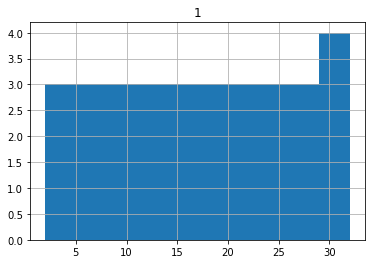

In [9]:
data.hist()
pl.show()

Comment on distribution

#### Correlation

In [10]:
data.corr()

,1
1,1.0


Comments on collinearity

#### 

Comments

## Revisions on original work plan

#### 

In [ ]:
Detail

#### 

#### 